In [1]:

import pandas as pd
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.externals import joblib
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Breast Cancer Dataset/data.csv",header=0)
df.shape

(569, 33)

In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
del df['Unnamed: 32']
del df['id']

In [5]:
print df.shape
print df.values.shape

(569, 31)
(569, 31)


In [6]:
y = df.values[:,0]
x = df.values[:,1:]
u = []
for i in y:
    if(i=='M'):
        u.append(1)
    else:
        u.append(0)
y = np.array(u)
print np.shape(y)

(569,)


In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.33,random_state=0)#,stratify = y)
print Counter(y_test),Counter(y_train)

Counter({0: 121, 1: 67}) Counter({0: 236, 1: 145})


In [11]:
for cri in ["entropy", "gini"]:
    rf = RandomForestClassifier(n_estimators=200,max_features=6,criterion=cri)
    rf.fit(X_train,y_train)
    print "Random forest (", "with :",cri,")",rf.score(X_test,y_test)

    et = ExtraTreesClassifier(n_estimators=200,max_features=6,criterion=cri)
    et.fit(X_train,y_train)
    print "Extra trees (", "with :",cri,")",et.score(X_test,y_test)

Random forest ( with : entropy ) 0.973404255319
Extra trees ( with : entropy ) 0.957446808511
Random forest ( with : gini ) 0.946808510638
Extra trees ( with : gini ) 0.968085106383


In [12]:
#Decision Tree Classifier.
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print "decision tree: ",dt.score(X_test,y_test)

decision tree:  0.914893617021


In [13]:
# SVM Classifier with default parameters.
#libsvm package in O(n^2)
SVM = svm.SVC()
SVM.fit(X_train,y_train)
print "SVM: ",SVM.score(X_test,y_test)


SVM:  0.643617021277


In [14]:
#Kernel : 'rbf'
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train,y_train)
print "SVM: ",SVM.score(X_test,y_test)


SVM:  0.643617021277


In [15]:
#Kernel : 'poly'
SVM = svm.SVC(kernel='poly',degree=2)
SVM.fit(X_train,y_train)
print "SVM: ",SVM.score(X_test,y_test)


SVM:  0.946808510638


In [16]:
#Kernel : 'sigmoid'
SVM = svm.SVC(kernel='sigmoid')
SVM.fit(X_train,y_train)
print "SVM: ",SVM.score(X_test,y_test)


SVM:  0.643617021277


In [17]:
#Kernel : 'linear'
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,y_train)
print "SVM: ",SVM.score(X_test,y_test)


SVM:  0.957446808511


In [18]:
#Kernel : 'linear'
count=1
x=1.0
while(count <= 25):
    SVM = svm.SVC(kernel='linear',C=x)
    SVM.fit(X_train,y_train)
    print "x : ", x ," SVM: ",SVM.score(X_test,y_test)
    x += 0.5
    count += 1

#Best C : [1.5]

x :  1.0  SVM:  0.957446808511
x :  1.5  SVM:  0.968085106383
x :  2.0  SVM:  0.962765957447
x :  2.5  SVM:  0.962765957447
x :  3.0  SVM:  0.957446808511
x :  3.5  SVM:  0.968085106383
x :  4.0  SVM:  0.957446808511
x :  4.5  SVM:  0.968085106383
x :  5.0  SVM:  0.962765957447
x :  5.5  SVM:  0.962765957447
x :  6.0  SVM:  0.968085106383
x :  6.5  SVM:  0.968085106383
x :  7.0  SVM:  0.968085106383
x :  7.5  SVM:  0.968085106383
x :  8.0  SVM:  0.968085106383
x :  8.5  SVM:  0.962765957447
x :  9.0  SVM:  0.962765957447
x :  9.5  SVM:  0.968085106383
x :  10.0  SVM:  0.957446808511
x :  10.5  SVM:  0.962765957447
x :  11.0  SVM:  0.962765957447
x :  11.5  SVM:  0.968085106383
x :  12.0  SVM:  0.952127659574
x :  12.5  SVM:  0.946808510638
x :  13.0  SVM:  0.952127659574


In [19]:
# 'OVO'
max_i = 0
maxacc=0.0
acc=0.0
for i in range(0,10):
     SVM = svm.SVC(kernel='linear',C=1.5,decision_function_shape='ovo',random_state=i)
     SVM.fit(X_train,y_train)
     acc=SVM.score(X_test,y_test)
     if (acc > maxacc):
        maxacc = acc
        max_i = i
     print "Random State ",i,":",acc
    
print "\nBest Results : ",max_i," : ",maxacc    

Random State  0 : 0.968085106383
Random State  1 : 0.968085106383
Random State  2 : 0.968085106383
Random State  3 : 0.968085106383
Random State  4 : 0.968085106383
Random State  5 : 0.968085106383
Random State  6 : 0.968085106383
Random State  7 : 0.968085106383
Random State  8 : 0.968085106383
Random State  9 : 0.968085106383

Best Results :  0  :  0.968085106383


In [20]:
#LinearSVC : with liblinear package in O(n)
#Random State given to ensure that the mean accuracy remains the same across multiple runs.
max_i = 0
maxacc=0.0
acc=0.0
for i in range(0,20):
     lin_svm = svm.LinearSVC(random_state=i)
     lin_svm.fit(X_train,y_train)
     acc=lin_svm.score(X_test,y_test)
     if (acc > maxacc):
        maxacc = acc
        max_i = i
     print "Random State ",i,":",acc
    
print "\nBest Results : ",max_i," : ",maxacc    

Random State  0 : 0.941489361702
Random State  1 : 0.877659574468
Random State  2 : 0.936170212766
Random State  3 : 0.851063829787
Random State  4 : 0.86170212766
Random State  5 : 0.952127659574
Random State  6 : 0.952127659574
Random State  7 : 0.957446808511
Random State  8 : 0.962765957447
Random State  9 : 0.925531914894
Random State  10 : 0.872340425532
Random State  11 : 0.936170212766
Random State  12 : 0.952127659574
Random State  13 : 0.914893617021
Random State  14 : 0.914893617021
Random State  15 : 0.962765957447
Random State  16 : 0.957446808511
Random State  17 : 0.563829787234
Random State  18 : 0.962765957447
Random State  19 : 0.872340425532

Best Results :  8  :  0.962765957447


In [21]:
#Linear SVM with the best random_state.
#Variation of 'penalty'.
for i in ["l1","l2"]:
    lin_svm = svm.LinearSVC(penalty=i,random_state=8,dual=False)
    lin_svm.fit(X_train,y_train)
    print lin_svm.score(X_test,y_test)

0.968085106383
0.968085106383


In [22]:
#Linear SVM with the best random_state.
#Variation of 'multi_class'.
for i in ["ovr","crammer_singer"]:
    lin_svm = svm.LinearSVC(multi_class=i,random_state=8,dual=False)
    lin_svm.fit(X_train,y_train)
    print lin_svm.score(X_test,y_test)

0.968085106383
0.941489361702


In [23]:
#Linear SVM with the best random_state.
#Variation of 'multi_class'.
lin_svm = svm.LinearSVC(multi_class="ovr",random_state=8,dual=False)
lin_svm.fit(X_train,y_train)
print lin_svm.score(X_test,y_test)

0.968085106383


In [24]:
df.shape

(569, 31)

In [25]:
df.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [26]:
X_train.shape

(381, 30)

In [27]:
finalclf = joblib.dump(lin_svm,"FinalCLF.pkl")

In [28]:
finalclf1 = joblib.load("FinalCLF.pkl")
print finalclf1.score(X_test,y_test)

0.968085106383


In [33]:
y = df['diagnosis']
del df['diagnosis']

Feature ranking:
1. feature 27 (0.123613)
2. feature 20 (0.102393)
3. feature 23 (0.090718)
4. feature 22 (0.073362)
5. feature 7 (0.069074)
6. feature 0 (0.057682)
7. feature 2 (0.057616)
8. feature 6 (0.055987)
9. feature 3 (0.052329)
10. feature 26 (0.042248)
11. feature 25 (0.027331)
12. feature 21 (0.024081)
13. feature 1 (0.023992)
14. feature 13 (0.023794)
15. feature 12 (0.021898)
16. feature 24 (0.019354)
17. feature 10 (0.017798)
18. feature 5 (0.017481)
19. feature 28 (0.014939)
20. feature 4 (0.011544)
21. feature 29 (0.010375)
22. feature 17 (0.009089)
23. feature 16 (0.008688)
24. feature 15 (0.007596)
25. feature 8 (0.007226)
26. feature 9 (0.006757)
27. feature 18 (0.006067)
28. feature 19 (0.005820)
29. feature 14 (0.005708)
30. feature 11 (0.005441)


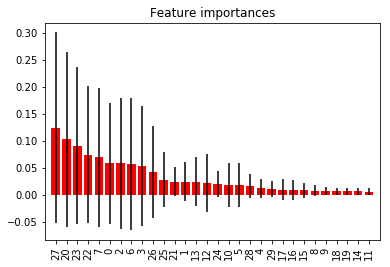

In [43]:
#FEATURE IMPORTANCES USING FOREST OF TREES.
# Build a forest and compute the feature importances

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(df,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df.shape[1]), indices,rotation='vertical')
plt.xlim([-1, df.shape[1]])
plt.show()

In [9]:
del df['diagnosis']

In [10]:
df.head(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [22]:
#Getting the average values of each column of the dataframe.
for i in range(0,df.shape[1]):
 print "i : ",i," ",np.mean(df[df.columns[i]]),"\n"

i :  0   14.1272917399 

i :  1   19.2896485062 

i :  2   91.9690333919 

i :  3   654.889103691 

i :  4   0.0963602811951 

i :  5   0.104340984183 

i :  6   0.0887993158172 

i :  7   0.0489191458699 

i :  8   0.181161862917 

i :  9   0.0627976098418 

i :  10   0.405172056239 

i :  11   1.21685342707 

i :  12   2.86605922671 

i :  13   40.3370790861 

i :  14   0.00704097891037 

i :  15   0.0254781388401 

i :  16   0.0318937163445 

i :  17   0.0117961370826 

i :  18   0.0205422987698 

i :  19   0.00379490386643 

i :  20   16.2691898067 

i :  21   25.6772231986 

i :  22   107.261212654 

i :  23   880.583128295 

i :  24   0.132368594025 

i :  25   0.254265043937 

i :  26   0.272188483304 

i :  27   0.114606223199 

i :  28   0.290075571178 

i :  29   0.0839458172232 

